
# **Decision Tree with:**

### ***1. Prepruning*** 

### ***2. Postpruning***

Autorzy:
1. Jakub Stępniak - nr indeksu: 297389
2. Jakub Kuczmarski - nr indeksu: 297300


# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

# ***Import dataset***

In [ ]:
data = 'PlayTennis.csv'
df = pd.read_csv(data)
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
# Delete the ID column in dataset if it exist
df.drop("day", axis=1, inplace=True) 

In [ ]:
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
# view dimensions of dataset
df.shape

(14, 5)

# **View summary of dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


# **Frequency distribution of values in variables**

In [ ]:
#Frequency counts of categorical variables.
col_names = df.head(1)
for col in col_names:
    print(df[col].value_counts())  


Sunny       5
Rain        5
Overcast    4
Name: outlook, dtype: int64
Mild    6
Hot     4
Cool    4
Name: temp, dtype: int64
High      7
Normal    7
Name: humidity, dtype: int64
Weak      8
Strong    6
Name: wind, dtype: int64
Yes    9
No     5
Name: play, dtype: int64


### Explore `class` variable


In [ ]:
# Last column, which contain class
last_column_name = df.columns[-1]
print(last_column_name)


play


In [ ]:
df[last_column_name].value_counts()

Yes    9
No     5
Name: play, dtype: int64

### Missing values in variables

In [ ]:
# check missing values in variables
df.isnull().sum()

outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [ ]:
X = df.drop([last_column_name], axis=1)
y = df[last_column_name]

In [ ]:
X

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [ ]:
columns=X.head(0)
columns

,outlook,temp,humidity,wind


In [ ]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

# **Create train and test datatset**


In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2, shuffle=True) 

In [ ]:
# check the shape of x_train and x_test
x_train.shape, x_test.shape

((9, 4), (5, 4))

In [ ]:
# check data types in x_train
x_train.dtypes

outlook     object
temp        object
humidity    object
wind        object
dtype: object

# **Encode categorical variables**


In [ ]:
x_train.head()

,outlook,temp,humidity,wind
3,Rain,Mild,High,Weak
1,Sunny,Hot,High,Strong
10,Sunny,Mild,Normal,Strong
7,Sunny,Mild,High,Weak
12,Overcast,Hot,Normal,Weak


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import category encoders
import category_encoders as ce

In [ ]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=columns)

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [ ]:
x_train.head()

,outlook,temp,humidity,wind
3,1,1,1,1
1,2,2,1,2
10,2,1,2,2
7,2,1,1,1
12,3,2,2,1


In [ ]:
x_test.head()

,outlook,temp,humidity,wind
11,3,1,1,2
4,1,3,2,1
5,1,3,2,2
0,2,2,1,1
9,1,1,2,1


# **Decision Tree Classifier**

In [ ]:
# instantiate the DecisionTreeClassifier model
clf = tree.DecisionTreeClassifier(random_state=0)

# fit the model
clf.fit(x_train,y_train)

# predict 
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# **Visualizing decision tree**

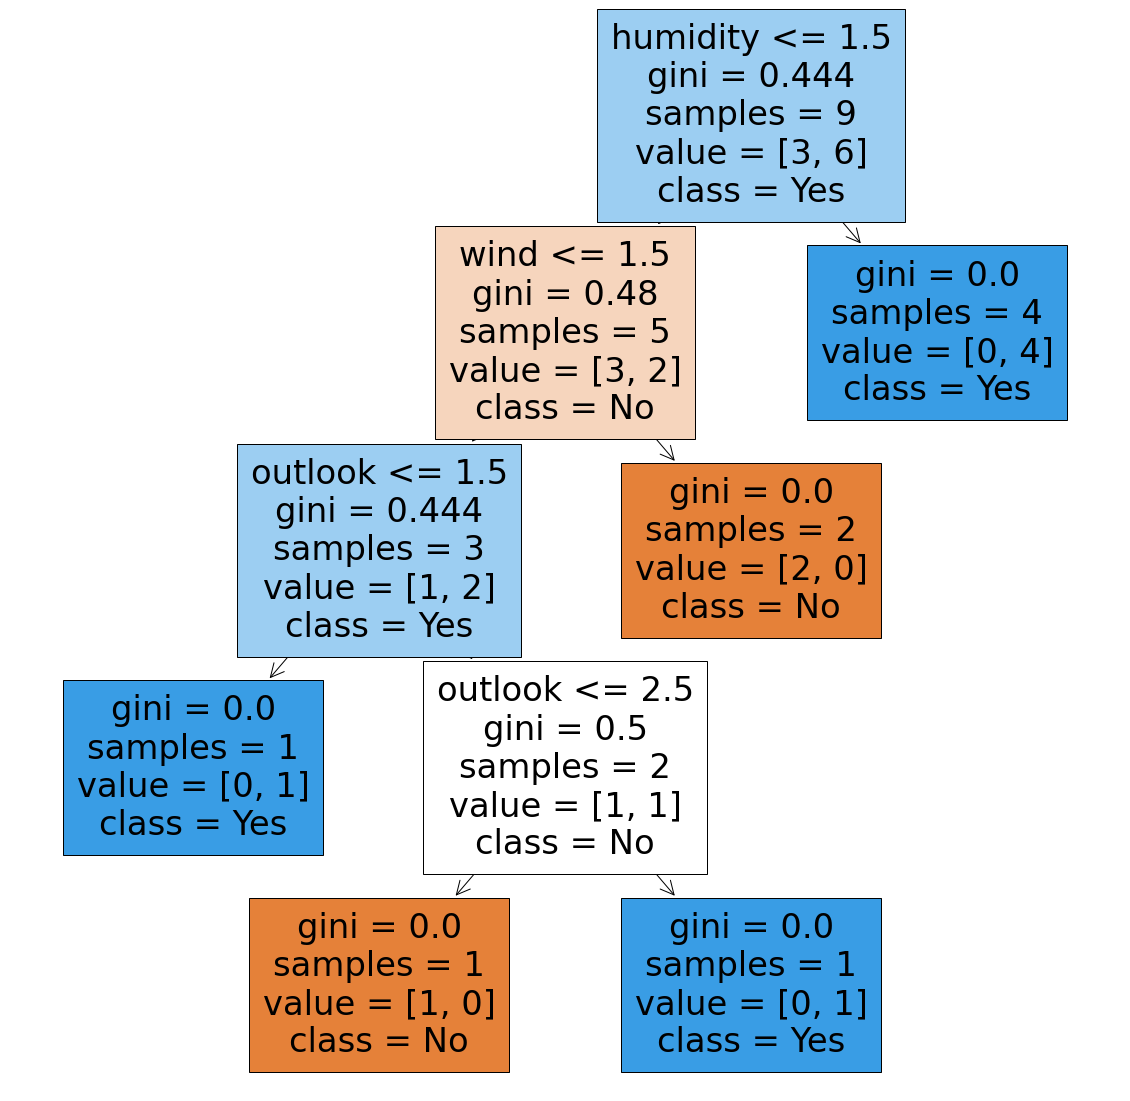

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = df[last_column_name].unique()
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.savefig("PlayTennisBeforPruning")
plt.show()


# **Confusion Matrix**

In [ ]:
# helper function to show Confision Matrix
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    FP_rate = cf[0][1] / (cf[0][1] + cf[0][0])
    specifity = 1 - FP_rate
    print(f'FP rate: {FP_rate}')
    print(f'Specifity: {specifity}')
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()


Train score 1.0
Test score 0.6
Train Confusion matrix
FP rate: 0.0
Specifity: 1.0


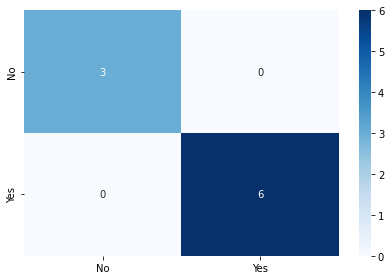

Test Confusion matrix
FP rate: 0.5
Specifity: 0.5


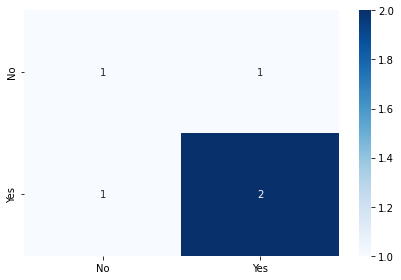

In [ ]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# **Classification report**

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



# **1. Pre pruning techniques**

Control parameters:
* max_depth: maximum depth of decision tree
* min_sample_split: The minimum number of samples required to split an internal node:
* min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [ ]:
params = {'max_depth': [4],
         'min_samples_split': [2],
         'min_samples_leaf': [1]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4], 'min_samples_leaf': [1],
                         'min_samples_split': [2]})

# **Confusion Matrix**

Train score 1.0
Test score 0.4
Train Confusion matrix
FP rate: 0.0
Specifity: 1.0


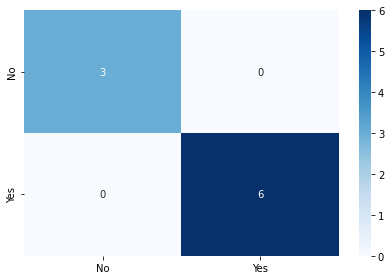

Test Confusion matrix
FP rate: 1.0
Specifity: 0.0


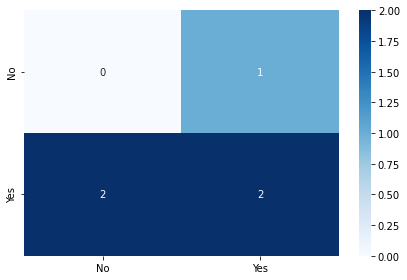

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# **Classification report**

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



# **Visualizing decision tree**

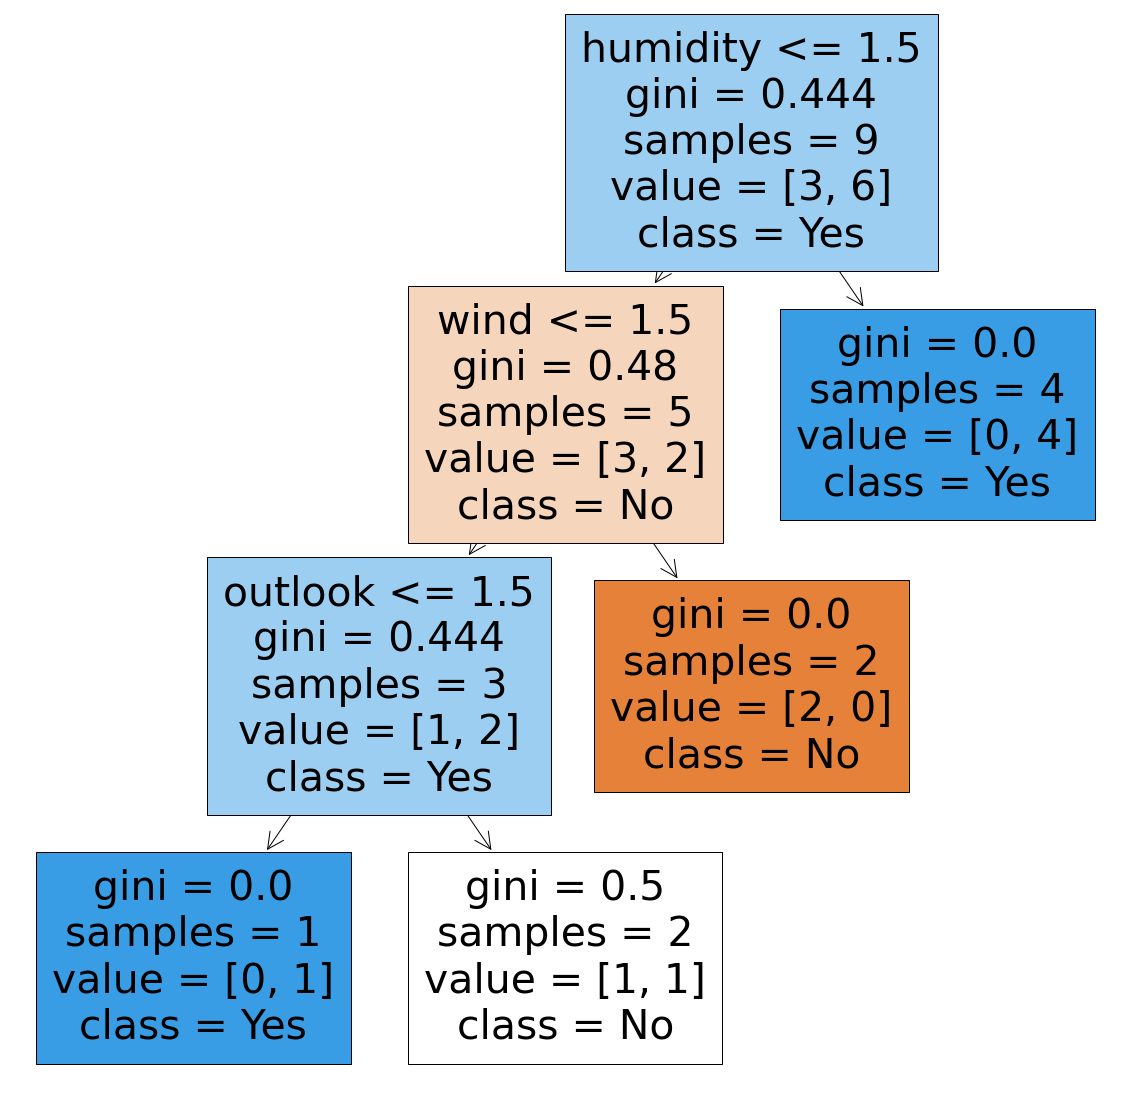

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = df[last_column_name].unique()
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.savefig("PlayTennisAfterPrePruning")
plt.show()

# **2. Post pruning techniques**

## **Cost Complexity Pruning**






In [ ]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.07407407 0.11851852 0.17777778]
[0.         0.14814815 0.26666667 0.44444444]


In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

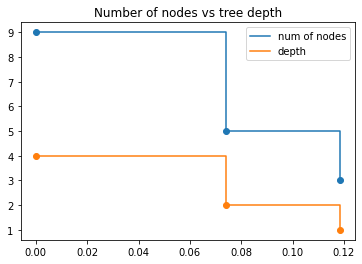

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='num of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.title('Number of nodes vs tree depth')
plt.show()

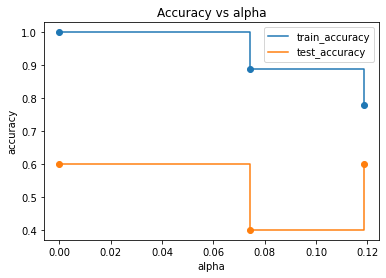

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

1. Alpha = 0.077 (PlayTennis.csv)
2. Alpha = 0.0046 (BreastCancer.csv)

# **Confusion Matrix**

Train score 0.8888888888888888
Test score 0.4
Train Confusion matrix
FP rate: 0.0
Specifity: 1.0


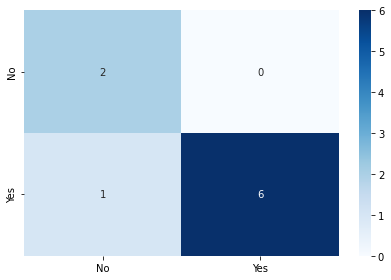

Test Confusion matrix
FP rate: 1.0
Specifity: 0.0


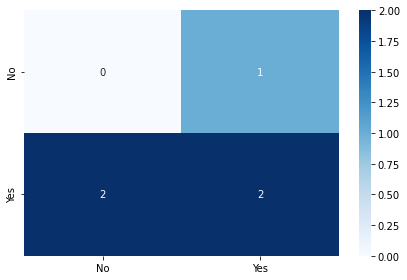

In [ ]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.077)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# **Classification report**

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         2
         Yes       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



We can see that now our model is not overfiting and performance on test data have improved

# **Visualizing decision tree**

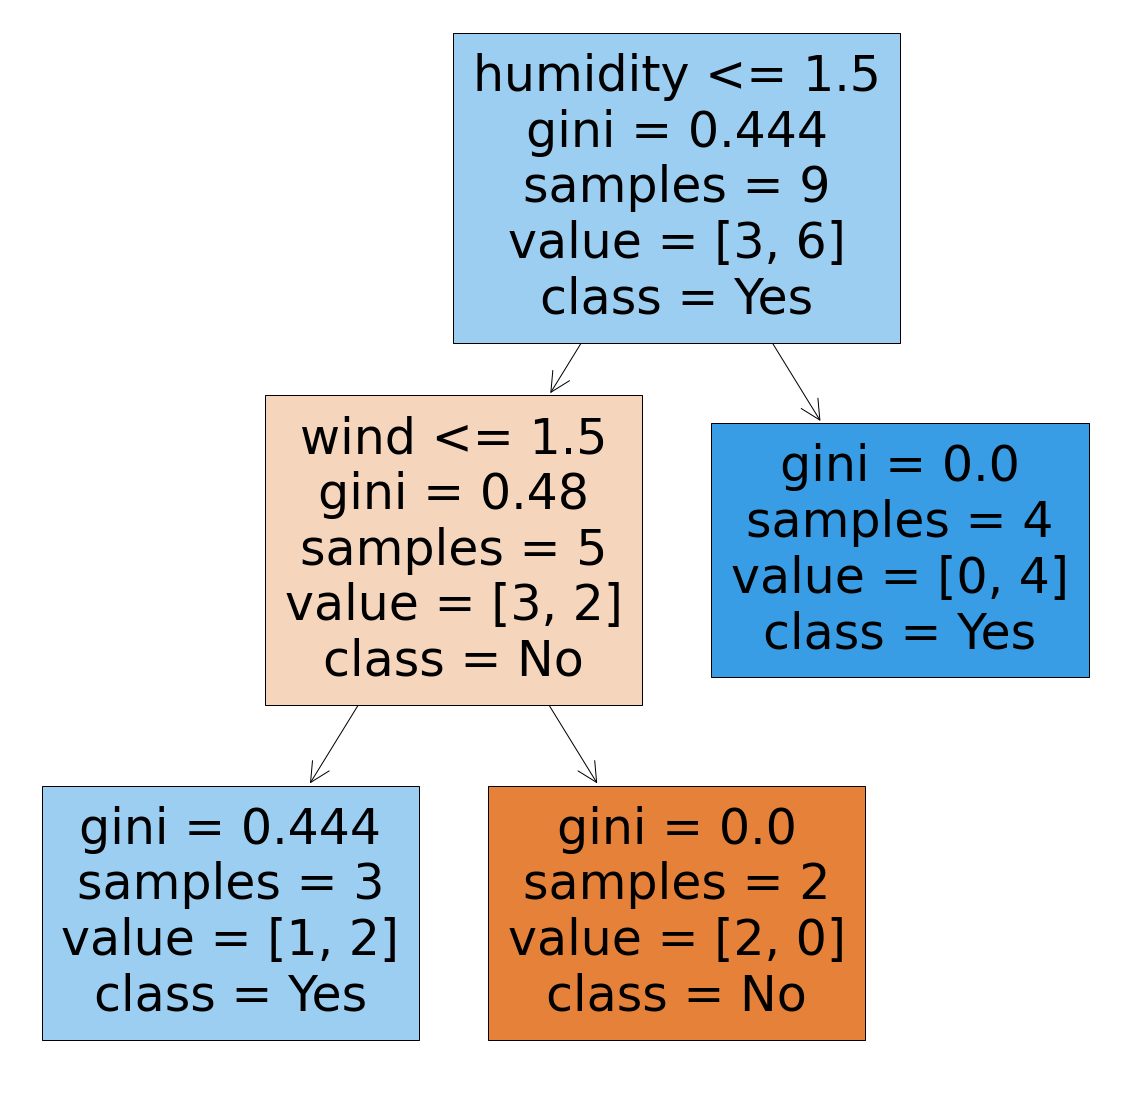

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = df[last_column_name].unique()
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.savefig("PlayTennisAfterPostPruning")
plt.show()